In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [8]:
# Download necessary resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/xantanium/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/xantanium/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/xantanium/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/xantanium/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [10]:
doc = "Tokenization is the first step in text analytics. It involves breaking down text into words or sentences."

In [11]:
# Tokenization
sent_tokens = sent_tokenize(doc)
word_tokens = word_tokenize(doc)
print("Sentence Tokenization:", sent_tokens)
print("Word Tokenization:", word_tokens)

Sentence Tokenization: ['Tokenization is the first step in text analytics.', 'It involves breaking down text into words or sentences.']
Word Tokenization: ['Tokenization', 'is', 'the', 'first', 'step', 'in', 'text', 'analytics', '.', 'It', 'involves', 'breaking', 'down', 'text', 'into', 'words', 'or', 'sentences', '.']


In [19]:
# Stopwords
# Removing Stop Words and Punctuation
stops = set(stopwords.words('english'))
puncs = set(string.punctuation)
# filtered_words = [word for word in word_tokens if word.lower() not in stops and word not in puncs]

for word in word_tokens:
    if (word.lower() not in stops) and (word not in puncs):
        filtered_words.append(word)
print("Filtered Words:", filtered_words)

Filtered Words: ['Tokenization', 'first', 'step', 'text', 'analytics', 'involves', 'breaking', 'text', 'words', 'sentences', 'Tokenization', 'first', 'step', 'text', 'analytics', 'involves', 'breaking', 'text', 'words', 'sentences']


In [13]:
# POS Tagging
pos_tags = pos_tag(filtered_words)
print("POS Tags:", pos_tags)

POS Tags: [('Tokenization', 'NN'), ('first', 'RB'), ('step', 'VB'), ('text', 'JJ'), ('analytics', 'NNS'), ('involves', 'VBZ'), ('breaking', 'VBG'), ('text', 'NN'), ('words', 'NNS'), ('sentences', 'NNS')]


In [14]:
# Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
print("Stemmed Words:", stemmed_words)

Stemmed Words: ['token', 'first', 'step', 'text', 'analyt', 'involv', 'break', 'text', 'word', 'sentenc']


In [15]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
print("Lemmatized Words:", lemmatized_words)

Lemmatized Words: ['Tokenization', 'first', 'step', 'text', 'analytics', 'involves', 'breaking', 'text', 'word', 'sentence']


In [16]:
# TF-IDF Calculation
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([doc])

feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_array = tfidf_matrix.toarray()

In [17]:
print("TF-IDF Feature Names:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

TF-IDF Feature Names: ['analytics' 'breaking' 'down' 'first' 'in' 'into' 'involves' 'is' 'it'
 'or' 'sentences' 'step' 'text' 'the' 'tokenization' 'words']
TF-IDF Matrix:
[[0.22941573 0.22941573 0.22941573 0.22941573 0.22941573 0.22941573
  0.22941573 0.22941573 0.22941573 0.22941573 0.22941573 0.22941573
  0.45883147 0.22941573 0.22941573 0.22941573]]


/tmp/ipykernel_15565/4154272321.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_names, y=tfidf_array[0], palette="viridis")


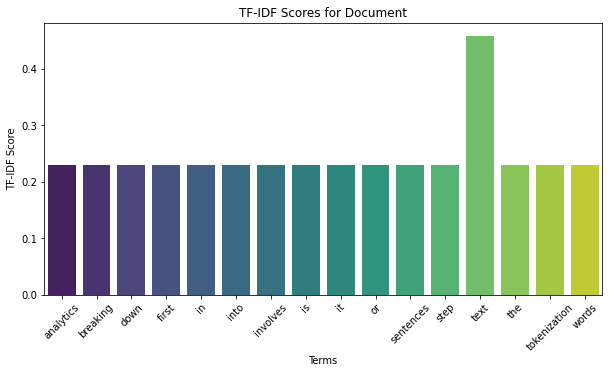

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_names, y=tfidf_array[0], palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Terms")
plt.ylabel("TF-IDF Score")
plt.title("TF-IDF Scores for Document")
plt.show()